# 2008 Airline on time dataset
## by Vincent Khor

## Preliminary Wrangling

> Briefly introduce your dataset here. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import math
%matplotlib inline
def darkgrid():
    sns.set_style('darkgrid')
    
def dark():
    sns.set_style('dark')

# set theme
darkgrid()

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Load necessary csv files.
flights = pd.read_csv('flights_2008.csv')

In [3]:
print('There are '+ str(flights.shape[0]) +' rows and ' + str(flights.shape[1]) + ' columns in this dataset.')

There are 2389217 rows and 29 columns in this dataset.


In [4]:
# Display basic information
flights.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               2389217 non-null  int64  
 1   Month              2389217 non-null  int64  
 2   DayofMonth         2389217 non-null  int64  
 3   DayOfWeek          2389217 non-null  int64  
 4   DepTime            2324775 non-null  float64
 5   CRSDepTime         2389217 non-null  int64  
 6   ArrTime            2319121 non-null  float64
 7   CRSArrTime         2389217 non-null  int64  
 8   UniqueCarrier      2389217 non-null  object 
 9   FlightNum          2389217 non-null  int64  
 10  TailNum            2346765 non-null  object 
 11  ActualElapsedTime  2319121 non-null  float64
 12  CRSElapsedTime     2388810 non-null  float64
 13  AirTime            2319121 non-null  float64
 14  ArrDelay           2319121 non-null  float64
 15  DepDelay           2324775 non-n

In [5]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [6]:
# Converting column names to be more descriptive
col_name = {'Year':'year', 'Month':'month', 'DayofMonth':'day_of_month','DayOfWeek':'day_of_week',
            'DepTime':'actual_dep_time','CRSDepTime':'scheduled_dep_time','ArrTime':'actual_arr_time',
            'CRSArrTime':'scheduled_arr_time','UniqueCarrier':'carrier_code','FlightNum':'flight_number',
            'TailNum':'tail_number','ActualElapsedTime':'actual_elapsed_time','CRSElapsedTime':'scheduled_elapsed_time',
            'AirTime':'air_time','ArrDelay':'arr_delay','DepDelay':'dep_delay','Origin':'origin','Dest':'destination',
            'Distance':'distance','TaxiIn':'taxi_in_time','TaxiOut':'taxi_out_time','Cancelled':'cancelled',
            'CancellationCode':'cancellation_code','Diverted':'diverted','CarrierDelay':'carrier_delay',
            'WeatherDelay':'weather_delay','NASDelay':'nas_delay', 'SecurityDelay':'security_delay',
            'LateAircraftDelay':'late_aircraft_delay'}
flights=flights.rename(columns=col_name)

In [7]:
flights.head()

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [8]:
# List new column names
flights.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   year                    2389217 non-null  int64  
 1   month                   2389217 non-null  int64  
 2   day_of_month            2389217 non-null  int64  
 3   day_of_week             2389217 non-null  int64  
 4   actual_dep_time         2324775 non-null  float64
 5   scheduled_dep_time      2389217 non-null  int64  
 6   actual_arr_time         2319121 non-null  float64
 7   scheduled_arr_time      2389217 non-null  int64  
 8   carrier_code            2389217 non-null  object 
 9   flight_number           2389217 non-null  int64  
 10  tail_number             2346765 non-null  object 
 11  actual_elapsed_time     2319121 non-null  float64
 12  scheduled_elapsed_time  2388810 non-null  float64
 13  air_time                2319121 non-null  float64
 14  ar

In [9]:
# replace 'day of week' values
day = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
flights['day_of_week'].replace(day, inplace=True)

In [10]:
# Set day order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
day_order = pd.api.types.CategoricalDtype(ordered=True, categories=days)
flights['day_of_week'] = flights['day_of_week'].astype(day_order);

In [11]:
# Confirm order
flights['day_of_week'].unique()

['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [12]:
flights.head()

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,1,3,Thursday,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,Thursday,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,Thursday,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,Thursday,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,Thursday,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [13]:
# Display descriptibe statistics for numeric variables
print(flights.describe())

            year         month  day_of_month  actual_dep_time  \
count  2389217.0  2.389217e+06  2.389217e+06     2.324775e+06   
mean      2008.0  2.505009e+00  1.566386e+01     1.340018e+03   
std          0.0  1.121493e+00  8.750405e+00     4.802717e+02   
min       2008.0  1.000000e+00  1.000000e+00     1.000000e+00   
25%       2008.0  1.000000e+00  8.000000e+00     9.300000e+02   
50%       2008.0  3.000000e+00  1.600000e+01     1.330000e+03   
75%       2008.0  4.000000e+00  2.300000e+01     1.733000e+03   
max       2008.0  4.000000e+00  3.100000e+01     2.400000e+03   

       scheduled_dep_time  actual_arr_time  scheduled_arr_time  flight_number  \
count        2.389217e+06     2.319121e+06        2.389217e+06   2.389217e+06   
mean         1.329992e+03     1.485835e+03        1.496744e+03   2.213888e+03   
std          4.657833e+02     5.081295e+02        4.845238e+02   1.951392e+03   
min          0.000000e+00     1.000000e+00        1.000000e+00   1.000000e+00   
25%      

Columns to convert:
- actual_dep_time
- scheduled_dep_time
- actual_arr_time
- scheduled_arr_time

### Converting time values format

Convert the format of columns `actual_dep_time`, `scheduled_dep_time`, `actual_arr_time` and `scheduled_arr_time` to a more readable format for time, HH:MM.

In [14]:
# are there any null values for actual_dep_time
flights[flights['actual_dep_time'].isnull()]

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
42,2008,1,3,Thursday,NaN,800,NaN,850,WN,609,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
259,2008,1,3,Thursday,NaN,700,NaN,830,WN,126,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
454,2008,1,3,Thursday,NaN,1100,NaN,1215,WN,1146,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
480,2008,1,3,Thursday,NaN,905,NaN,1025,WN,469,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
482,2008,1,3,Thursday,NaN,1620,NaN,1740,WN,618,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387945,2008,4,16,Wednesday,NaN,855,NaN,1012,DL,1214,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2387946,2008,4,16,Wednesday,NaN,1045,NaN,1217,DL,1215,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2388936,2008,4,17,Thursday,NaN,1240,NaN,1506,DL,916,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2389184,2008,4,17,Thursday,NaN,1100,NaN,1152,DL,1183,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


There are null values, so we want to examine whether these are null because there were no delays. First, look at how no delays are recorded.

In [15]:
flights.carrier_delay.sort_values()

1124398    0.0
1910886    0.0
1010515    0.0
1010514    0.0
1910896    0.0
          ... 
2389212    NaN
2389213    NaN
2389214    NaN
2389215    NaN
2389216    NaN
Name: carrier_delay, Length: 2389217, dtype: float64

There is a mixture of NaN and 0 used to record no delays. To standardise this, they will all be converted to 0 as the delay is recorded in minutes

In [16]:
# convert NaN values to 0
delay_columns = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

for column in delay_columns:
    print('Start: There are '+str(flights[column].isnull().sum()) +' NaN values in the '+str(column)+' column.')
    flights[column].fillna(0,inplace=True)
    print('End: There are '+str(flights[column].isnull().sum()) +' NaN values in the '+str(column)+' column. \n')

Start: There are 1804634 NaN values in the carrier_delay column.
End: There are 0 NaN values in the carrier_delay column. 

Start: There are 1804634 NaN values in the weather_delay column.
End: There are 0 NaN values in the weather_delay column. 

Start: There are 1804634 NaN values in the nas_delay column.
End: There are 0 NaN values in the nas_delay column. 

Start: There are 1804634 NaN values in the security_delay column.
End: There are 0 NaN values in the security_delay column. 

Start: There are 1804634 NaN values in the late_aircraft_delay column.
End: There are 0 NaN values in the late_aircraft_delay column. 



In [17]:
# see how many records have no cancellations and have NaN values for actual_dep_time and actual_arr_time
flights.loc[(flights['actual_dep_time'].isnull())&
            (flights['actual_arr_time'].isnull())&
            (flights['carrier_delay']==0)&
            (flights['weather_delay']==0)&
            (flights['nas_delay']==0)&
            (flights['security_delay']==0)&
            (flights['late_aircraft_delay']==0)]

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
42,2008,1,3,Thursday,NaN,800,NaN,850,WN,609,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
259,2008,1,3,Thursday,NaN,700,NaN,830,WN,126,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
454,2008,1,3,Thursday,NaN,1100,NaN,1215,WN,1146,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
480,2008,1,3,Thursday,NaN,905,NaN,1025,WN,469,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
482,2008,1,3,Thursday,NaN,1620,NaN,1740,WN,618,...,NaN,NaN,1,C,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387945,2008,4,16,Wednesday,NaN,855,NaN,1012,DL,1214,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
2387946,2008,4,16,Wednesday,NaN,1045,NaN,1217,DL,1215,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
2388936,2008,4,17,Thursday,NaN,1240,NaN,1506,DL,916,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0
2389184,2008,4,17,Thursday,NaN,1100,NaN,1152,DL,1183,...,NaN,NaN,1,A,0,0.0,0.0,0.0,0.0,0.0


The number of rows matches the dataframe above. Therefore, we can replace all NaNs with the scheduled times.

In [18]:
# If actual_dep_time is NaN and there are no delays, set time as scheduled_dep_time
flights['actual_dep_time'] = np.where(flights['actual_dep_time'].isnull(),flights['scheduled_dep_time'],flights['actual_dep_time'])

In [19]:
# If actual_arr_time is NaN and there are no delays, set time as scheduled_arr_time
flights['actual_arr_time'] = np.where(flights['actual_arr_time'].isnull(),flights['scheduled_arr_time'],flights['actual_arr_time'])

In [20]:
flights.actual_dep_time.sort_values()

1138140       1.0
2322557       1.0
1452245       1.0
278564        1.0
567676        1.0
            ...  
2045153    2400.0
2070514    2400.0
1436096    2400.0
2078065    2400.0
404687     2400.0
Name: actual_dep_time, Length: 2389217, dtype: float64

In [21]:
flights.actual_arr_time.sort_values()

1112424       1.0
348140        1.0
1699401       1.0
366630        1.0
833892        1.0
            ...  
1272867    2400.0
475871     2400.0
896879     2400.0
2129760    2400.0
1053237    2400.0
Name: actual_arr_time, Length: 2389217, dtype: float64

There are now no more NaN values, there are some times that have been recorded as 2400.0 however, these will be converted to 0000.0 later, an acceptable time format as midnight is the start of a new day.

In [22]:
# convert actual_dep_time, scheduled_dep_time, actual_arr_time, scheduled_arr_time to a more readable format HH:MM
# Columns to convert
convert_col = ['actual_dep_time','scheduled_dep_time','actual_arr_time','scheduled_arr_time']

for column in convert_col:
        #Convert to string
        flights[column] = flights[column].astype(str)
        
        # remove .0 if present
        flights[column] = flights[column].str.replace('\.0','')
        
        # pad string so it is 4 digits 
        flights[column] = flights[column].str.zfill(4)
        
        # Convert to format HH:MM
        flights[column] = flights[column].apply(lambda x:"{}:{}".format(x[:2],x[2:]))
        
        # replace 24:00 with 00:00
        flights[column].replace({'24:00':'00:00'}, inplace=True)
        
        # check if any times are still 24:00 instead of 00:00
        print(column+', ' + str(flights[flights[column]=='24:00'].shape[0])+' still need converting.')

actual_dep_time, 0 still need converting.
scheduled_dep_time, 0 still need converting.
actual_arr_time, 0 still need converting.
scheduled_arr_time, 0 still need converting.


In [23]:
flights['actual_dep_time'].sort_values()

811542     00:00
2130853    00:00
1319562    00:00
148975     00:00
2049045    00:00
           ...  
316473     23:59
2009211    23:59
2158519    23:59
1325250    23:59
1468775    23:59
Name: actual_dep_time, Length: 2389217, dtype: object

In [24]:
flights.head()

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,1,3,Thursday,13:43,13:25,14:51,14:35,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,Thursday,11:25,11:20,12:47,12:45,WN,1343,...,3.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,Thursday,20:09,20:15,21:36,21:40,WN,3841,...,2.0,14.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,Thursday,09:03,08:55,12:03,12:05,WN,3,...,5.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2008,1,3,Thursday,14:23,14:00,17:26,17:10,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [25]:
flights.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   year                    2389217 non-null  int64   
 1   month                   2389217 non-null  int64   
 2   day_of_month            2389217 non-null  int64   
 3   day_of_week             2389217 non-null  category
 4   actual_dep_time         2389217 non-null  object  
 5   scheduled_dep_time      2389217 non-null  object  
 6   actual_arr_time         2389217 non-null  object  
 7   scheduled_arr_time      2389217 non-null  object  
 8   carrier_code            2389217 non-null  object  
 9   flight_number           2389217 non-null  int64   
 10  tail_number             2346765 non-null  object  
 11  actual_elapsed_time     2319121 non-null  float64 
 12  scheduled_elapsed_time  2388810 non-null  float64 
 13  air_time                2319121 non-null  

## update notes
**Need to update variable names in description of variables.**
- merge airport locations?
- update string to time in HH:MM for columns with time
- 

save dataset as new csv..

In [118]:
# copy dataset before analysis

### What is the structure of your dataset? -- update this section --

This flight dataset contains 2,389,217 rows of data with 29 different variables that have been recorded.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in examining which variables are best for predicting airline on-time performance. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that will help support my investigation will be time variables as well as reasons for the delays, cancellations and diversions.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

ideas:
- carrier code distribution
- arr delay
- dep delay
- origin
- destination
    

In [120]:
print((flights.cancelled==0).sum())
print((flights.cancelled==1).sum())

2324775
64442


As the main purpose of this project is to examine the factors that contribute towards a flight not being on time, there are two ways in which a flight may not arrive on time, a flight may be cancelled or it may be delayed. I will first be looking at the distribution of flights that get cancelled.

### Comparing the number of flights vs flights cancelled

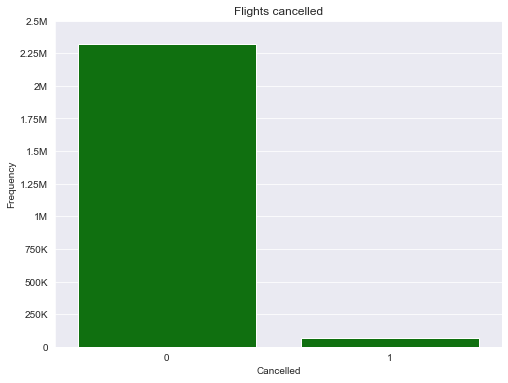

In [28]:
darkgrid()
# Cancelled flights
plt.figure(figsize=(8,6))

# Plot barchart
sns.countplot(data=flights,x='cancelled', color='green')

# labels
ticks = np.arange(0,25e5+25e4,25e4)
plt.yticks(ticks,['0','250K','500K','750K','1M','1.25M','1.5M','1.75M','2M','2.25M','2.5M'])
plt.ylabel('Frequency')
plt.xlabel('Cancelled')
plt.title('Flights cancelled');

Only a small proportion of flights are cancelled as shown in the bar chart above, 0 represents flights not cancelled whilst 1 represents flights cancelled. It would be interesting to see the reason why some of these flights get cancelled.

### Comparing the distribution of cancellation codes.

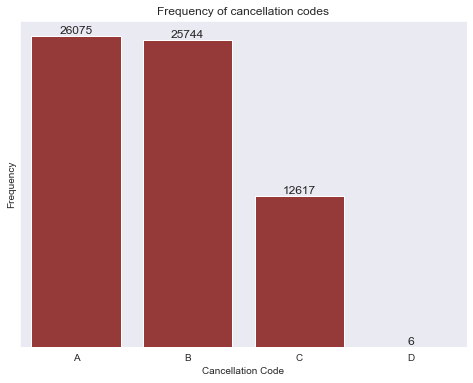

In [274]:
# Cancellation code count

# Plot graph
plt.figure(figsize=(8,6))
code_order = ['A','B','C','D']
sns.countplot(data=flights,x='cancellation_code',order=code_order,color='brown')

# Labels
plt.xlabel('Cancellation Code')
plt.ylabel('Frequency')
plt.yticks([])
plt.title('Frequency of cancellation codes')

# value counts on bars
cancellation_count = flights.cancellation_code.value_counts()
for i in range (cancellation_count.shape[0]):
    count = cancellation_count[i]
    plt.text(i,count+900,count,ha='center',va='top',size=12);

The bar chart above shows that the most common cancellation code is A (Carrier) followed closely by B (weather). C (NAS), is much less frequent, approximately half as frequent as A and B. D (Security) was the least common, there were only 6 instances where a flight was cancelled due to security issues. 

A flight may also not be on time because it is delayed. Next, I will be examining the distribution of arrival and departure delays.

### Comparing the distribution of arrival and departure delay times

In [38]:
print('The minimum departure delay is ' + str(int(flights.dep_delay.min())) + ' minutes.')
print('The maximum departure delay is ' + str(int(flights.dep_delay.max())) + ' minutes.')

print('The minimum arrival delay is ' + str(int(flights.arr_delay.min())) + ' minutes.')
print('The maximum arrival delay is ' + str(int(flights.arr_delay.max())) + ' minutes.')

The minimum departure delay is -92 minutes.
The maximum departure delay is 2467 minutes.
The minimum arrival delay is -91 minutes.
The maximum arrival delay is 2461 minutes.


Some flights departed early and whilst some flights arrived early. Below are two histograms, these show the difference in the scheduled and actual times for departures and arrivals.

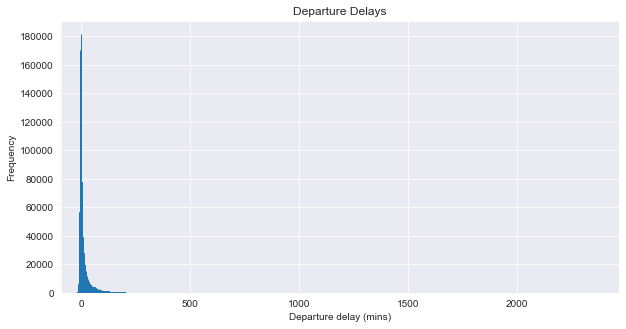

In [39]:
plt.figure(figsize=(10,5))
# flight departure delays
bins = np.arange(flights.dep_delay.min()-1,flights.dep_delay.max()+1,1)

# Plotting flight departure delays
plt.xlim(flights.dep_delay.min()-1,flights.dep_delay.max()+1)
tick_locs = np.arange(0,180000+20000,20000)
plt.yticks(tick_locs)

# plot graph
base_colour = sns.color_palette()[0]
plt.hist(data=flights,x='dep_delay',bins=bins,ec=base_colour,color=base_colour)

# Labels
plt.xlabel('Departure delay (mins)')
plt.ylabel('Frequency')
plt.title('Departure Delays');

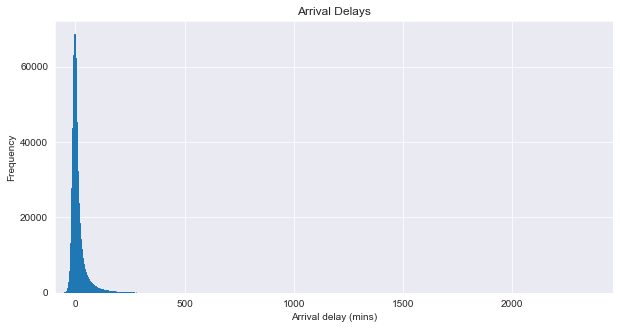

In [40]:
plt.figure(figsize=(10,5))
# flight arrival delays
bins = np.arange(flights.arr_delay.min()-1,flights.arr_delay.max()+1,1)

#set limits and axis
plt.xlim(flights.arr_delay.min()-1,flights.arr_delay.max()+1)
tick_locs = np.arange(0,180000+20000,20000)
plt.yticks(tick_locs)

# plot graph
plt.hist(data=flights,x='arr_delay',bins=bins,ec=base_colour,color=base_colour)

# Labels
plt.xlabel('Arrival delay (mins)')
plt.ylabel('Frequency')
plt.title('Arrival Delays');

Both of the histograms above show that most flights departed or arrived on time. The y scales on both histograms however are not the same and there appears to be some outliers causing both histograms to be right-skewed. This has the effect of compacting the areas of interest towards the left side of the diagram. A further comparison of these will be made with limits set to the x axis and with the same scale for yticks for easier comparison. This will allow us to examine the distributions with greater detail.

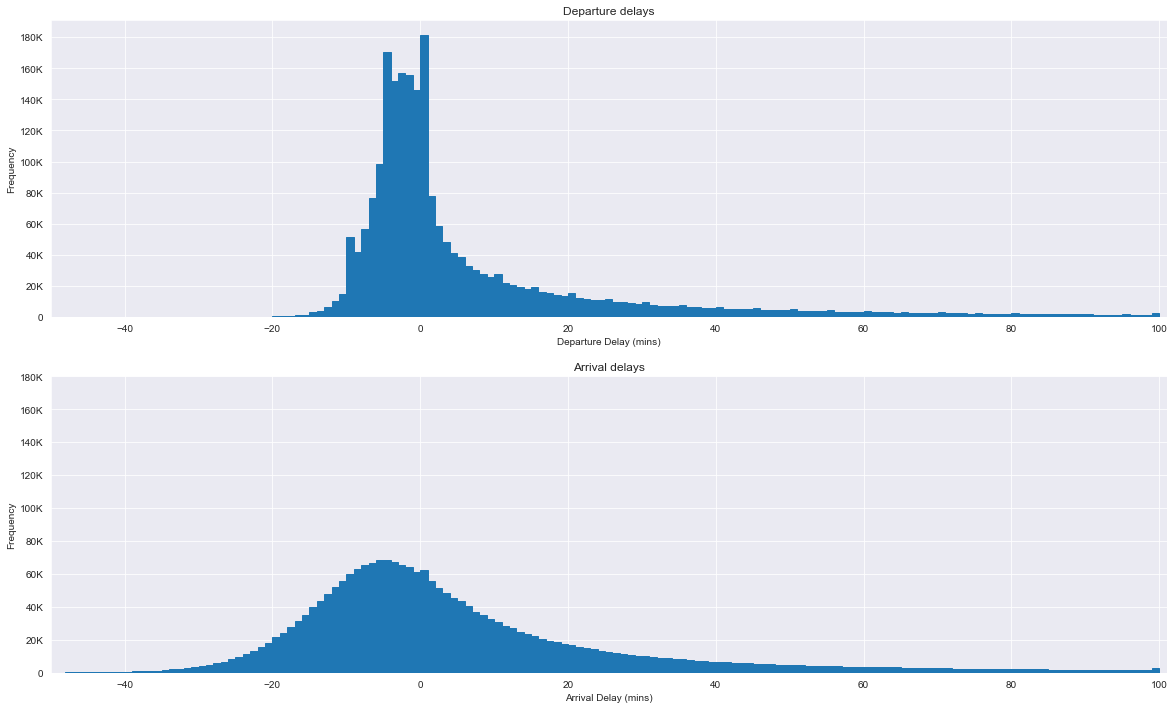

In [151]:
# Comparing departure and arrival delay times
plt.figure(figsize = (20, 12))

bins = np.arange(-50,100+1,1) # Select bin size
tick_locs = np.arange(0,18e4+2e4,2e4) # set tick locations
tick_labels = [0,'20K','40K','60K','80K','100K','120K','140K','160K','180K']

# plot departure delay times
plt.subplot(2,1,1)
plt.hist(data=flights,x='dep_delay',bins=bins,ec=base_colour,color=base_colour)
# set labels and axes
plt.yticks(tick_locs,tick_labels)
plt.xlim(-50,100+1)
plt.ylabel('Frequency')
plt.xlabel('Departure Delay (mins)')
plt.title('Departure delays')

# plot arrival delay times
plt.subplot(2,1,2)
plt.hist(data=flights,x='arr_delay',bins=bins,ec=base_colour,color=base_colour)
# set labels and axes
plt.xlim(-50,100+1)
plt.yticks(tick_locs,tick_labels)
plt.ylabel('Frequency')
plt.xlabel('Arrival Delay (mins)')
plt.title('Arrival delays');

<ipython-input-332-d6ec77bd8a61>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)


Text(0.5, 1.0, 'Arrival delays')

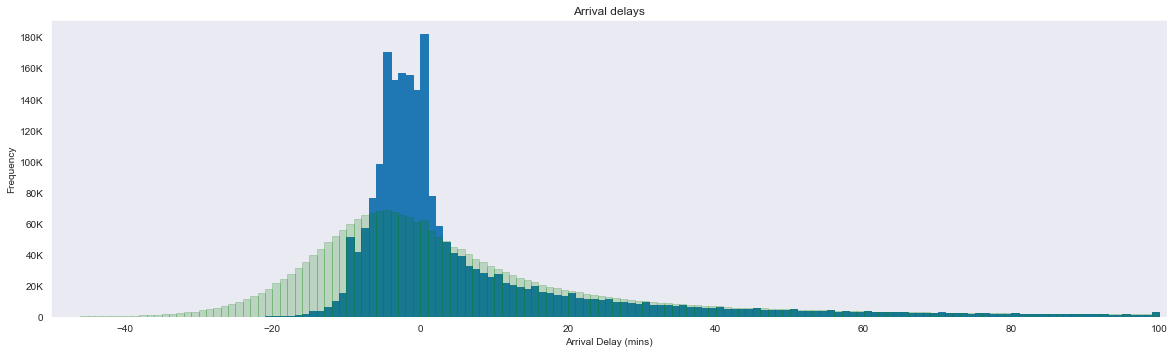

In [332]:
# Comparing departure and arrival delay times
plt.figure(figsize = (20, 12))

bins = np.arange(-50,100+1,1) # Select bin size
tick_locs = np.arange(0,18e4+2e4,2e4) # set tick locations
tick_labels = [0,'20K','40K','60K','80K','100K','120K','140K','160K','180K']

# plot departure delay times
plt.subplot(2,1,1)
plt.hist(data=flights,x='dep_delay',bins=bins,ec=base_colour,color=base_colour)
# set labels and axes
plt.yticks(tick_locs,tick_labels)
plt.xlim(-50,100+1)
plt.ylabel('Frequency')
plt.xlabel('Departure Delay (mins)')
plt.title('Departure delays')

# plot arrival delay times
plt.subplot(2,1,1)
plt.hist(data=flights,x='arr_delay',bins=bins,ec='green',color='green',alpha=0.2)
# set labels and axes
plt.xlim(-50,100+1)
plt.yticks(tick_locs,tick_labels)
plt.ylabel('Frequency')
plt.xlabel('Arrival Delay (mins)')
plt.title('Arrival delays')

When comparing these two histograms, both show that most flights depart and arrive on time. However, flights are more likely to depart on time whilst fewer arrive on time. This comparison can easily be made as the y axis scale on both histograms are now the same. Flight arrival times are also more likely to vary from the scheduled arrival time. We can see that more flights are likely to arrive early compared to departing less of an issue, most would view it as a benefit. 

Flights may end up taking less time to reach their destination, for example due to good or advantageous weather such as wind in the same direction of travel; pilots flying at a faster speed to makeup time, or perhaps airlines are more likely to overestimate the time required to reach their destination to allow some buffer incase things go wrong leading to delays. A flight arriving early is also going to make the passengers happy and reflect well on the carrier potentially leading to more people using that carrier if they want to arrive on time.

By comparing the distribution of flights that depart late and those that arrive late, it appears as though the distribution is around the same. This is because most flights that depart late are likely to still arrive late.

Overall, a lot of flights will depart and arrive on time, however there are more flights arriving early than departing early. This suggests a lot of flights can make up time throughout the flight. The amount of flights departing late appears to be about the same as those arriving late.

The final reason why a flight may not arrive on time may be because it got diverted.

### Examining the distribution of diverted flights.

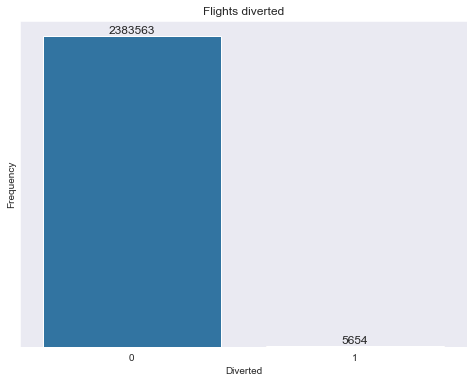

In [273]:
plt.figure(figsize=(8,6))

# Plot barchart
sns.countplot(data=flights,x='diverted')

# labels
ticks = np.arange(0,25e5+25e4,25e4)
plt.yticks(ticks,['0','250K','500K','750K','1M','1.25M','1.5M','1.75M','2M','2.25M','2.5M'])
plt.ylabel('Frequency')
plt.yticks([])
plt.xlabel('Diverted')
plt.title('Flights diverted')

# value counts on bars
diverted_count = flights.diverted.value_counts()
for i in range (diverted_count.shape[0]):
    count = diverted_count[i]
    plt.text(i,count+80000,count,ha='center',va='top',size=12);

2,383,563 flights were not diverted whilst 5,654 flights were. Therefore, very few flights are diverted, if a flight doesn't arrive on time, it is more likely to be cancelled or delayed rather than diverted. Next, I will be examining some of the other general statistics individually that may also influence whether a flight arrives on time starting with the day of the week.

### Examining the distribution of flights grouped by day of the week

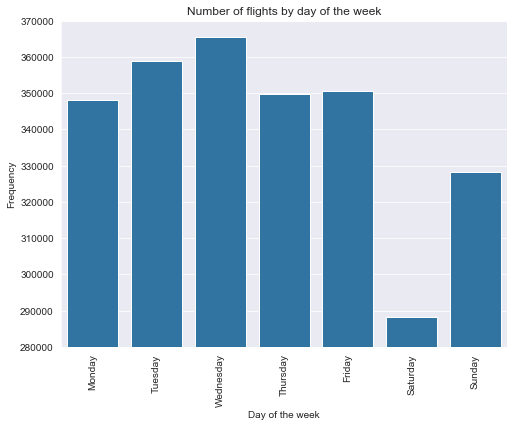

In [29]:
# Plot graph
plt.figure(figsize=(8,6))
base_colour = sns.color_palette()[0]
sns.countplot(data=flights,x='day_of_week',color=base_colour)

# Labels
tick_locs = np.arange(270000,flights['day_of_week'].value_counts().values.max()+10000,10000)
plt.xticks(rotation=90)
plt.yticks(tick_locs) # set y ticks
plt.ylim([28e4,37e4]) # set y axis limits
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Number of flights by day of the week');

The bar graph above shows that the frequency of flights differs depending on the day of the week. Weekends have the fewest number of flights whilst Wednesdays have the most. I will later be examining whether the day of the week affects the proportion of delayed/diverted/cancelled flights when performing a bivariate analysis.

I will next be comparing flight distances as this may potentially have an effect on punctuality.

### Comparing flight distances

In [31]:
# Find the min and max flight distances
flights.distance.describe()

count    2.389217e+06
mean     7.261589e+02
std      5.571763e+02
min      1.700000e+01
25%      3.250000e+02
50%      5.830000e+02
75%      9.570000e+02
max      4.962000e+03
Name: distance, dtype: float64

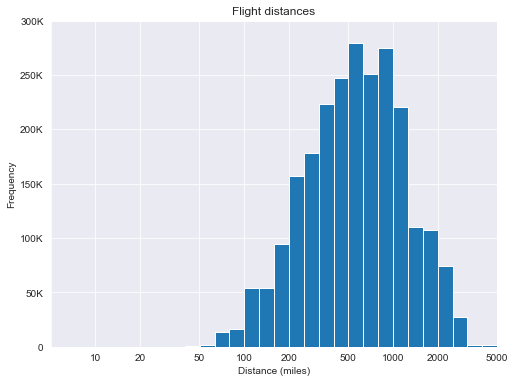

In [32]:
# Flight distances

# Select bin size
bins = 10 ** np.arange(-1,3.7+0.1,0.1)

# Plot graph
plt.figure(figsize=(8,6))
plt.hist(data=flights,x='distance', bins=bins)

# set x axis scale
plt.xscale('log')

# set x and y axis labels (custom)
x_ticks = [10,20,50,100,200,500,1000,2000,5000]
x_labels = ['{}'.format(v) for v in x_ticks]
y_ticks = np.arange(0,3e5+5e4,5e4)
y_labels = ['0','50K','100K','150K','200K','250K','300K']

# Labels and title
plt.xticks(x_ticks,x_labels)
plt.yticks(y_ticks,y_labels)
plt.title('Flight distances')
plt.ylabel('Frequency')
plt.xlabel('Distance (miles)')
plt.xlim(5,5000);

The graph above shows that the most common flights were between 500-1000 miles. Some flights were up to 5,000 miles whilst others were less than 50 miles. Therefore, there is a large variation in flight distances.

### Comparing flight airtimes

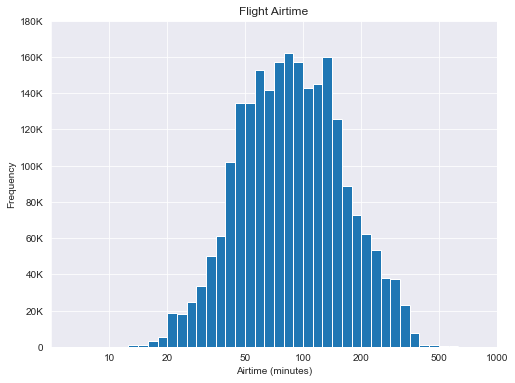

In [33]:
# Flight airtimes

# Select bin size
bins = 10 ** np.arange(-1,3+0.05,0.05)

# Plot graph
plt.figure(figsize=(8,6))
plt.hist(data=flights,x='air_time',bins=bins)

# set x axis scale
plt.xscale('log')

# set axis labels (custom)
x_ticks = [10,20,50,100,200,500,1000]
x_labels = ['{}'.format(v) for v in x_ticks]

y_ticks = np.arange(0,18e4+2e4,2e4)
y_labels = ['0','20K','40K','60K','80K','100K','120K','140K','160K','180K']

# Labels and title
plt.xticks(x_ticks,x_labels)
plt.yticks(y_ticks,y_labels)
plt.title('Flight Airtime')
plt.ylabel('Frequency')
plt.xlabel('Airtime (minutes)')
plt.xlim(5,1000);

The airtime for most flights was around 100mins. The distribution of flight times appears normally distributed when taking the log values of airtime.

### What are the top 15 airport origins and destinations?

In [229]:
# data setup:
origin_freq = flights.origin.value_counts() # top airport origins
dest_freq = flights.destination.value_counts() # top airport destinations
thres = 15 # set threshold

# set order
origin_order = origin_freq.index[:thres]
dest_order = dest_freq.index[:thres]

# create subset dataframes
origin_sub = flights.loc[flights['origin'].isin(origin_order)]
dest_sub = flights.loc[flights['destination'].isin(dest_order)]

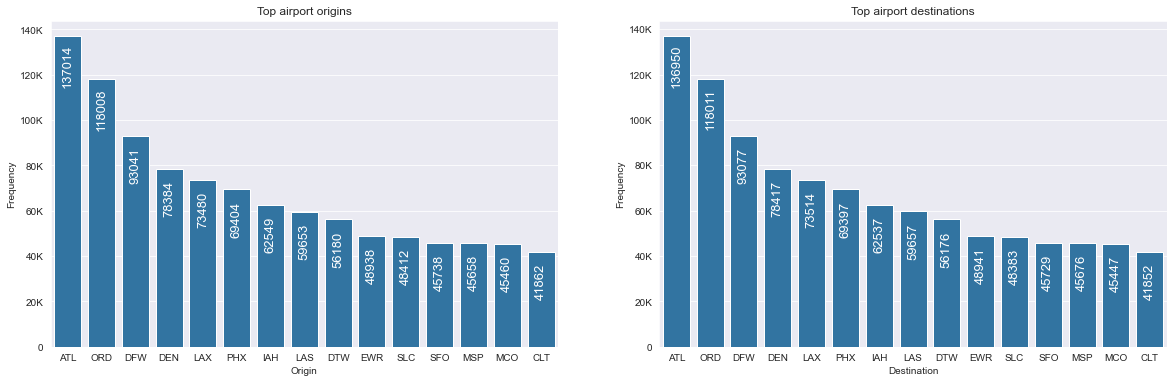

In [276]:
plt.figure(figsize = [20, 6])
base_colour = sns.color_palette()[0]

# set y labels
tick_locs = np.arange(0,14e4+2e4,2e4)
tick_labels = ['0','20K','40K','60K','80K','100K','120K','140K']

# plot top origins
plt.subplot(1,2,1)
sns.countplot(data=origin_sub,x='origin',order=origin_order,color=base_colour)
plt.yticks(tick_locs,tick_labels)
plt.ylabel('Frequency')
plt.xlabel('Origin')
plt.title('Top airport origins')

# value counts on bars
origin_count = origin_sub.origin.value_counts()
for i in range (origin_count.shape[0]):
    count = origin_count[i]
    plt.text(i,count-13000,count,ha='center',va='center',rotation=90,color='white',size=13)

# plot top destinations
plt.subplot(1,2,2)
sns.countplot(data=dest_sub,x='destination',order=dest_order,color=base_colour)
plt.yticks(tick_locs,tick_labels)
plt.ylabel('Frequency')
plt.xlabel('Destination')
plt.title('Top airport destinations');

# value counts on bars
dest_count = dest_sub.destination.value_counts()
for i in range (dest_count.shape[0]):
    count = dest_count[i]
    plt.text(i,count-13000,count,ha='center',va='center',rotation=90,color='white',size=13)

The top 15 airport origins and destinations are the same as expected. This makes sense as a plane landing at an airport should then make a flight with passengers to another airport as it would be efficient to do so.

### Comparing the number of flights by carrier

In [258]:
print('There are '+str(len(flights.carrier_code.unique()))+' unique carriers listed in this dataset.')

There are 20 unique carriers listed in this dataset.


In [259]:
# set order
carrier_order = flights.carrier_code.value_counts().index
carrier_order

Index(['WN', 'AA', 'OO', 'MQ', 'UA', 'US', 'DL', 'XE', 'NW', 'CO', 'EV', '9E',
       'FL', 'YV', 'OH', 'B6', 'AS', 'F9', 'HA', 'AQ'],
      dtype='object')

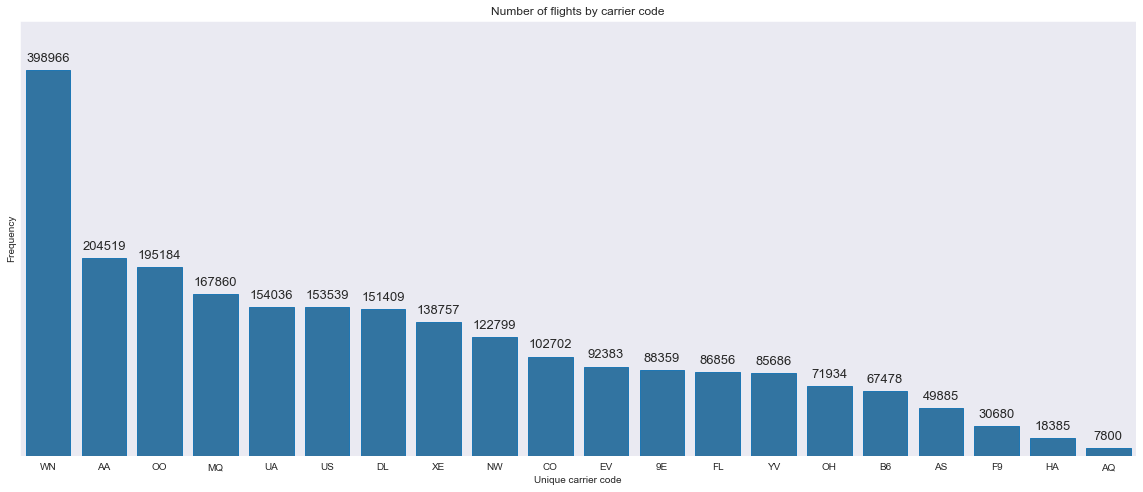

In [262]:
base_colour = sns.color_palette()[0]
plt.figure(figsize=(20,8))
# plot graph
sns.countplot(data=flights,x='carrier_code',order=carrier_order,color = base_colour,ec=base_colour)

# Labels
plt.yticks([])
plt.ylim(0,450000)
plt.ylabel('Frequency')
plt.xlabel('Unique carrier code')
plt.title('Number of flights by carrier code')

# value counts on bars
carrier_count = flights.carrier_code.value_counts()
for i in range (carrier_count.shape[0]):
    count = carrier_count[i]
    plt.text(i,count+18000,count,ha='center',va='top',size=13);

The number of flights for each carrier varies significantly, there were around 400,000 flights by WN whilst AQ only had 7800. It is therefore important to take into account the proportion of flights when examining trends.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

ideas:
- distance vs cancellation - if not update description in univariate
- carrier vs acncellation
- subplots for cancelled vs carrier/weather/nas/security/late aircraft delays
- faceting top airports vs delay/cancellation times

In [45]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   year                    int64   
 1   month                   int64   
 2   day_of_month            int64   
 3   day_of_week             category
 4   actual_dep_time         object  
 5   scheduled_dep_time      object  
 6   actual_arr_time         object  
 7   scheduled_arr_time      object  
 8   carrier_code            object  
 9   flight_number           int64   
 10  tail_number             object  
 11  actual_elapsed_time     float64 
 12  scheduled_elapsed_time  float64 
 13  air_time                float64 
 14  arr_delay               float64 
 15  dep_delay               float64 
 16  origin                  object  
 17  destination             object  
 18  distance                int64   
 19  taxi_in_time            float64 
 20  taxi_out_time           float64 
 21  cancelle

I will first be looking at the pairwise correlations between features in the data.

In [100]:
numeric_vars =['actual_elapsed_time', 'air_time', 'arr_delay', 'dep_delay', 'distance',
              'carrier_delay', 'weather_delay','nas_delay', 'security_delay','late_aircraft_delay']

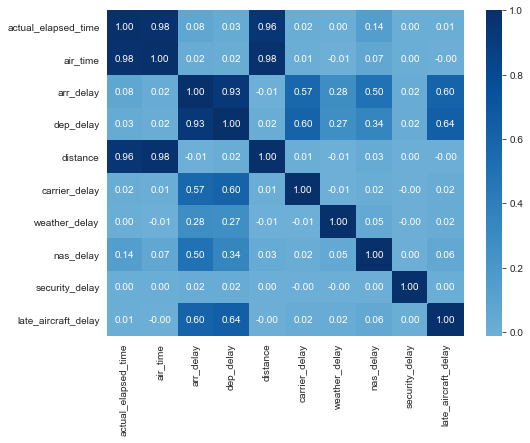

In [105]:
# correlation plot

plt.figure(figsize=(8,6))
sns.heatmap(flights[numeric_vars].corr(),annot=True, fmt='.2f',cmap='Blues',center=0)
plt.show();

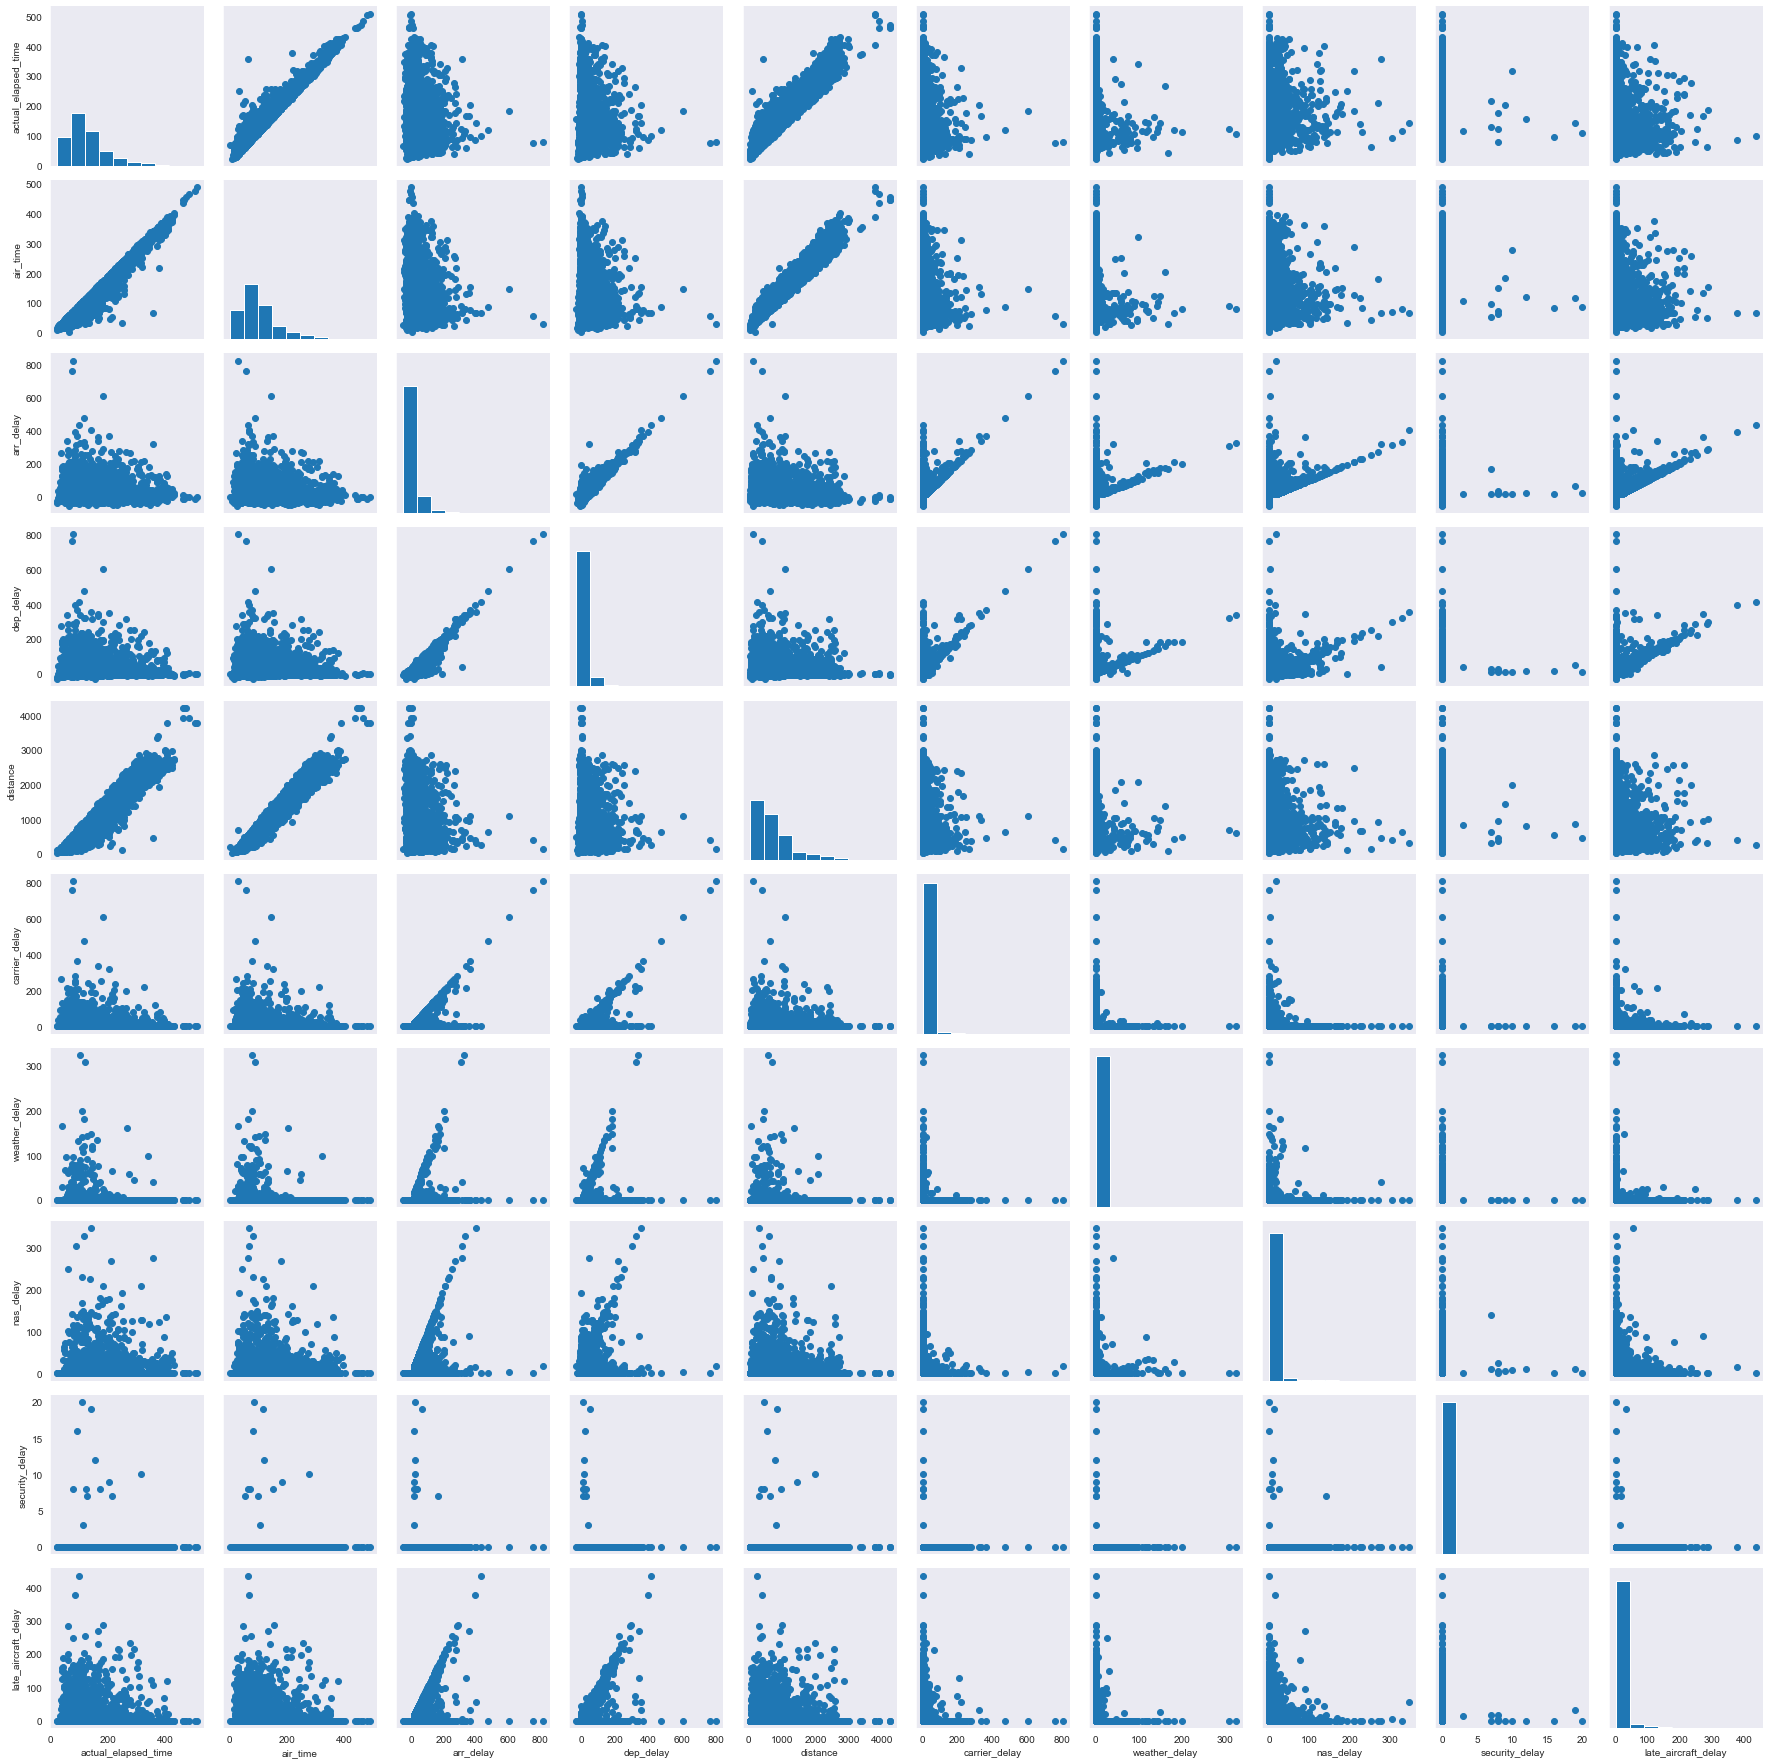

In [104]:
# plot matrix: plotting a sample of the dataset.

samples = np.random.choice(flights.shape[0],10000,replace=False)
flights_samp = flights.loc[samples,:]

g = sns.PairGrid(data = flights_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=10)
g.map_offdiag(plt.scatter);

The correlation plot and plot matrix above shows that there is a strong positive correlation between actual elapsed time, air time and distance. This is to be expected as longer flight distances would take longer to reach. There is also a strong positive correlation between departure and arrival delays, this is also to be expected as flights that leave late are also likely to arrive late. The other variables that are correlated include departure and arrival delays when compared with delays due to carrier, weather, NAS and late aircraft. Again, these are to be expected as if there is a delay due to one of these reasons, it would also lead to delays in the flight departing and arriving. Surprisingly, there is very little correlation between security delays and departure or arrival delays, perhaps this is due to there only being 6 instances of security delays in the dataset and therefore does not have a large impact on the correlation.

### Number of cancelled flights by day of the week

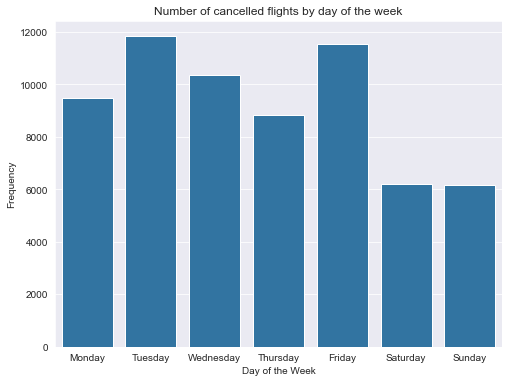

In [46]:
plt.figure(figsize=(8,6))

# Create subset of cancelled flights
flight_cancelled = flights[flights.cancelled==1]

# plot graph
sns.countplot(data=flight_cancelled,x='day_of_week',color=base_colour)

#labels
plt.title('Number of cancelled flights by day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency');

The graph above shows the total number of cancellations by day of the week. This shows that by number, there were fewest cancellations on weekends. However, as the number of flight varies by day (weekends have the fewest flights) it would be more appropriate to calculate the proportion of cancelled flights by day.

### Proportion of cancelled flights by day of the week

In [47]:
# Calculate the overall proportion of cancelled flights
flights.cancelled.mean()

0.026972016355148988

This shows that there is currently a 2.7% chance of a flight being cancelled, however, how does this rate differ when we group by day?

In [48]:
day_means = flights.groupby('day_of_week',as_index=False).mean()
day_means

,day_of_week,year,month,day_of_month,flight_number,actual_elapsed_time,scheduled_elapsed_time,air_time,arr_delay,dep_delay,distance,taxi_in_time,taxi_out_time,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,Monday,2008.0,2.538326,16.662427,2223.238606,127.840537,128.454466,104.395835,10.736384,11.830805,718.140423,6.789648,16.662573,0.027263,0.002411,3.727168,0.694285,4.210398,0.015541,5.371876
1,Tuesday,2008.0,2.516604,15.038834,2209.909980,128.199643,128.252338,104.595394,10.584612,11.194131,716.673658,6.787882,16.827042,0.032989,0.002948,3.435260,0.813638,4.732804,0.013779,5.084746
2,Wednesday,2008.0,2.512635,15.975378,2224.709016,126.991325,128.312957,103.821266,7.776017,9.390146,716.951726,6.737166,16.437661,0.028373,0.002005,3.501855,0.549724,3.349160,0.019764,4.125706
3,Thursday,2008.0,2.418448,16.151239,2220.490194,128.371085,128.764167,104.503995,10.248991,10.998889,720.152496,6.816513,17.056830,0.025246,0.001961,3.792640,0.600844,3.801807,0.016888,5.095340
4,Friday,2008.0,2.476156,15.355508,2218.707864,129.039905,128.803218,104.639271,14.630594,14.768929,720.630766,6.974399,17.438517,0.032955,0.002450,4.329422,0.979502,4.972008,0.022327,6.565269
5,Saturday,2008.0,2.540037,14.643919,2190.617007,131.175208,133.346527,108.418612,7.509435,10.001837,761.042677,6.816639,15.951889,0.021475,0.002711,4.097262,0.734739,2.949357,0.028206,4.253703
6,Sunday,2008.0,2.540844,15.646847,2204.514317,129.266385,130.555623,106.018129,10.066515,11.750415,736.974394,6.965339,16.289207,0.018797,0.002127,4.185326,0.663518,3.457812,0.023139,5.332830


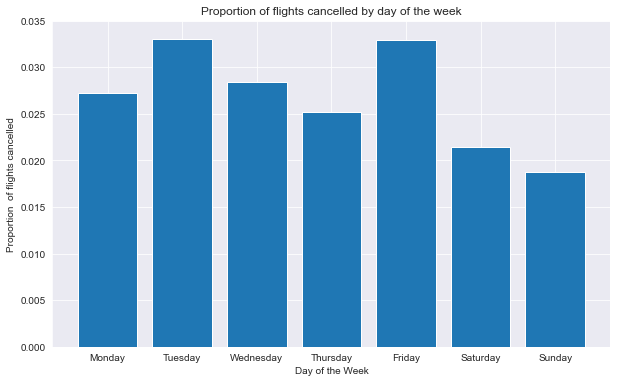

In [49]:
plt.figure(figsize=(10,6))
plt.bar(data=day_means,x='day_of_week',height='cancelled')

# tick locations
tick_locs = np.arange(0,day_means.cancelled.max()+0.005,0.005)
plt.yticks(tick_locs)

# Labels
plt.xlabel('Day of the Week')
plt.ylabel('Proportion  of flights cancelled')
plt.title('Proportion of flights cancelled by day of the week');

This shows the proportion of cancellations does differ from day to day. The days with the highest proportion of cancelled flights are Tuesday and Fridays, Saturday and Sundays have the lowest proportion of cancellations.

### Which airports have the most/least cancellations by proportion?

In [50]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   year                    int64   
 1   month                   int64   
 2   day_of_month            int64   
 3   day_of_week             category
 4   actual_dep_time         object  
 5   scheduled_dep_time      object  
 6   actual_arr_time         object  
 7   scheduled_arr_time      object  
 8   carrier_code            object  
 9   flight_number           int64   
 10  tail_number             object  
 11  actual_elapsed_time     float64 
 12  scheduled_elapsed_time  float64 
 13  air_time                float64 
 14  arr_delay               float64 
 15  dep_delay               float64 
 16  origin                  object  
 17  destination             object  
 18  distance                int64   
 19  taxi_in_time            float64 
 20  taxi_out_time           float64 
 21  cancelle

In [51]:
airport_group = flights.groupby('origin',as_index=False).mean()
airport_group

,origin,year,month,day_of_month,flight_number,actual_elapsed_time,scheduled_elapsed_time,air_time,arr_delay,dep_delay,distance,taxi_in_time,taxi_out_time,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ABE,2008.0,2.509012,15.658173,4210.604723,114.701847,114.727781,90.965040,9.090369,8.411184,526.683654,9.430739,14.296053,0.055314,0.002486,4.280298,0.594158,5.086389,0.000000,3.378496
1,ABI,2008.0,2.434240,15.665533,3423.365079,55.880282,56.894558,36.690141,10.430751,11.395076,158.000000,9.307512,9.885111,0.032880,0.001134,7.568027,2.643991,2.869615,0.000000,1.730159
2,ABQ,2008.0,2.513081,15.677058,1681.235316,109.088237,111.276144,91.471470,5.543149,7.812677,649.567175,6.581338,11.035230,0.010539,0.001400,1.782961,0.181222,1.714423,0.002358,5.333997
3,ABY,2008.0,2.511962,15.698565,4473.203349,54.241463,55.031100,34.963415,11.141463,11.970732,146.000000,10.802439,8.475610,0.019139,0.000000,7.538278,1.074163,3.787081,0.000000,0.669856
4,ACT,2008.0,2.414115,15.657790,3265.936085,50.861538,51.749667,30.539860,5.935664,6.832168,89.000000,10.969231,9.352448,0.047936,0.000000,1.805593,0.579228,1.862850,0.000000,4.660453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,WRG,2008.0,2.495868,15.636364,64.500000,29.797357,32.615702,17.215859,0.806167,5.217391,56.500000,4.264317,8.360870,0.049587,0.012397,0.925620,1.132231,1.285124,0.000000,7.132231
287,XNA,2008.0,2.510678,15.710008,4030.132538,111.454364,110.405326,86.097475,15.283784,14.441768,578.561558,9.941294,15.434696,0.052554,0.002303,4.246859,1.134003,7.261935,0.000000,5.757328
288,YAK,2008.0,2.495868,15.636364,63.500000,47.260870,48.628099,36.243478,2.521739,5.923404,206.000000,3.547826,7.548936,0.028926,0.020661,0.446281,0.198347,0.685950,0.000000,13.227273
289,YKM,2008.0,2.714286,16.027473,3862.659341,101.162011,90.000000,81.145251,13.670391,2.508380,586.000000,6.642458,13.374302,0.016484,0.000000,3.412088,1.000000,1.483516,0.000000,4.714286


In [52]:
origin_cancelled = airport_group.cancelled.sort_values(ascending=False)

In [53]:
# data setup:
airport_group = flights.groupby('origin',as_index=False).mean() # mean values grouped by origin
cancelled_prop = airport_group.cancelled.sort_values(ascending=False) #sort cancelled means
thres = 10

# Set order
most_cancelled = cancelled_prop.index[:thres]
least_cancelled = cancelled_prop.index[-thres:]

# Create proportions dataframe
most_cancelled_sub = airport_group.loc[most_cancelled]
least_cancelled_sub = airport_group.loc[least_cancelled]

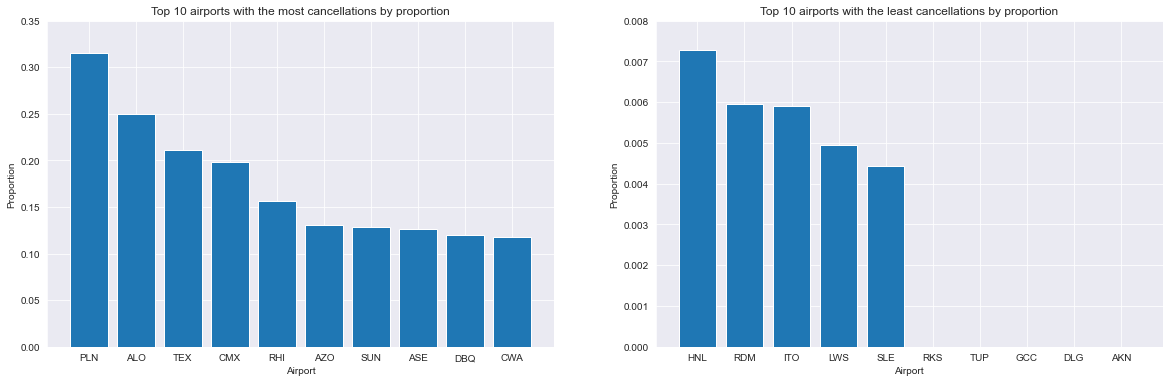

In [54]:
plt.figure(figsize = [20, 6])
base_colour = sns.color_palette()[0]

# set y labels
most_tick_locs = np.arange(0,0.35+0.05,0.05)
least_tick_locs = np.arange(0,0.008+0.001,0.001)
# plot most cancelled
plt.subplot(1,2,1)
plt.bar(data=most_cancelled_sub,x='origin',height='cancelled')
plt.yticks(most_tick_locs)
plt.ylabel('Proportion')
plt.xlabel('Airport')
plt.title('Top 10 airports with the most cancellations by proportion')

# plot least cancelled
plt.subplot(1,2,2)
plt.bar(data=least_cancelled_sub,x='origin',height='cancelled')
plt.yticks(least_tick_locs)
plt.ylabel('Proportion')
plt.xlabel('Airport')
plt.title('Top 10 airports with the least cancellations by proportion');

The graphs above show that there is a large difference between the airports with the most cancellations by proportion and those with the least. Whilst the mean for a cancelled flight was 2.7%, PLN had just over 30% of their flights cancelled whilst on the other hand, there were 5 airports (RKS, TUP, GCC, DLG and AKN) that have had no cancellations in this dataset.

In [55]:
# Top 5 airports with the highest proportion of cancels
high_prop_cancels = ['PLN','ALO','TEX','CMX','RHI']
high_cancel_flights = flights.loc[flights['origin'].isin(high_prop_cancels)].shape[0]
print('The top 5 airports with the highest proportion of cancellations account for '+str(high_cancel_flights)
     + ' out of '+ str(flights.shape[0])+' flights.')

The top 5 airports with the highest proportion of cancellations account for 461 out of 2389217 flights.


In [56]:
# Airports with no cancels
no_cancels = ['RKS','TUP','GCC','DLG','AKN']
no_cancel_flights = flights.loc[flights['origin'].isin(no_cancels)].shape[0]
print('The airports that had no cancellations account for '+str(no_cancel_flights)
     + ' out of '+ str(flights.shape[0])+' flights.')

The airports that had no cancellations account for 172 out of 2389217 flights.


Therefore, as these airports have very few flights, cancellations have a greater effect on the proportion of cancelled flights when there are cancellations. Also, if there are very few flights and none or very few are cancelled, the proportion of cancellations can also very small. Due to these reasons, we examine the most extreme outliers on either end of the distribution with airports that have few flights.

### Compare carriers and flight distance

In [57]:
# data setup:
carrier_means = flights.groupby('carrier_code').mean()
carrier_order = carrier_means.distance.sort_values().index

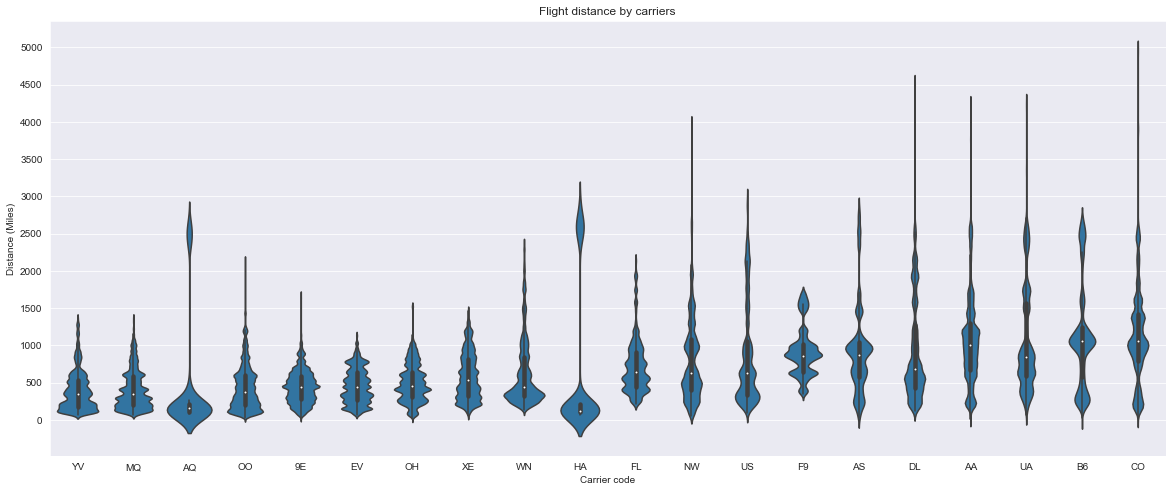

In [58]:
plt.figure(figsize=(20,8))
base_colour = sns.color_palette()[0]

# plot violinplot
sns.violinplot(data=flights, x='carrier_code',y='distance', color=base_colour,order=carrier_order)

# labels
plt.ylabel('Distance (Miles)')
plt.xlabel('Carrier code')
tick_locs = np.arange(0,5000+500,500)
plt.yticks(tick_locs)
plt.title('Flight distance by carriers');

The violin plot above shows that the flight distance by carriers varies significantly. The carriers have been ordered ascendingly by mean flight distance. Carriers such as YV and MQ only do short distance flights. AQ and HA appear to mostly do short or medium distance flights but not very much in between. CO does the longest flight distance of all, at around 5,000 miles. All carriers do short distance flights but not all do long distance flights.

### Departure delays by carrier

In [59]:
# set order
carrier_delay = flights.groupby('carrier_code').mean()
order = carrier_delay.dep_delay.sort_values(ascending=False).index
order

Index(['UA', 'AA', 'EV', 'MQ', 'YV', 'CO', 'XE', 'B6', 'WN', '9E', 'OH', 'FL',
       'OO', 'NW', 'DL', 'AS', 'F9', 'US', 'HA', 'AQ'],
      dtype='object', name='carrier_code')

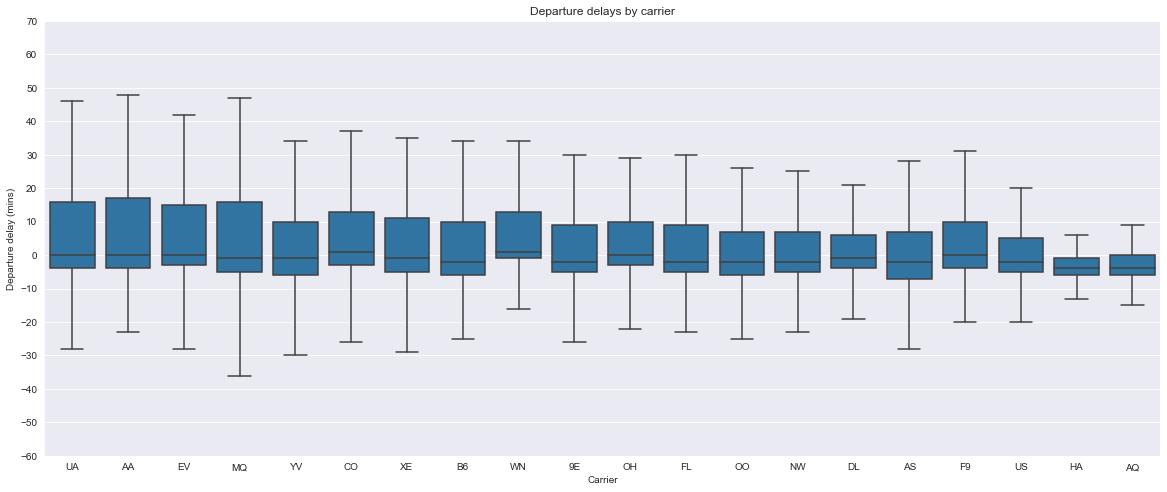

In [60]:
plt.figure(figsize=(20,8))
sns.boxplot(data=flights, x='carrier_code',y='dep_delay', color=base_colour,order=order,showfliers=False)

# labels
plt.xlabel('Carrier')
plt.ylabel('Departure delay (mins)')
tick_locs = np.arange(-60,70+10,10)
plt.yticks(tick_locs)
plt.title('Departure delays by carrier');

The boxplot above shows that the mean departure delay for most carriers is no more than a couple minutes suggesting that most flights do leave on time. When comparing the range of values however, some carriers such as HA and AQ have a smaller range of delay times whilst other carriers such as UA, AA, EV and MQ can experience delays of upwards of 40mins in rare instances. Therefore, although on average, the carriers listed generally depart on time, there are some carriers that have shorter delays when they do occur. 

Next, arrival delays by carrier should be explored.

### Arrival delays by carrier

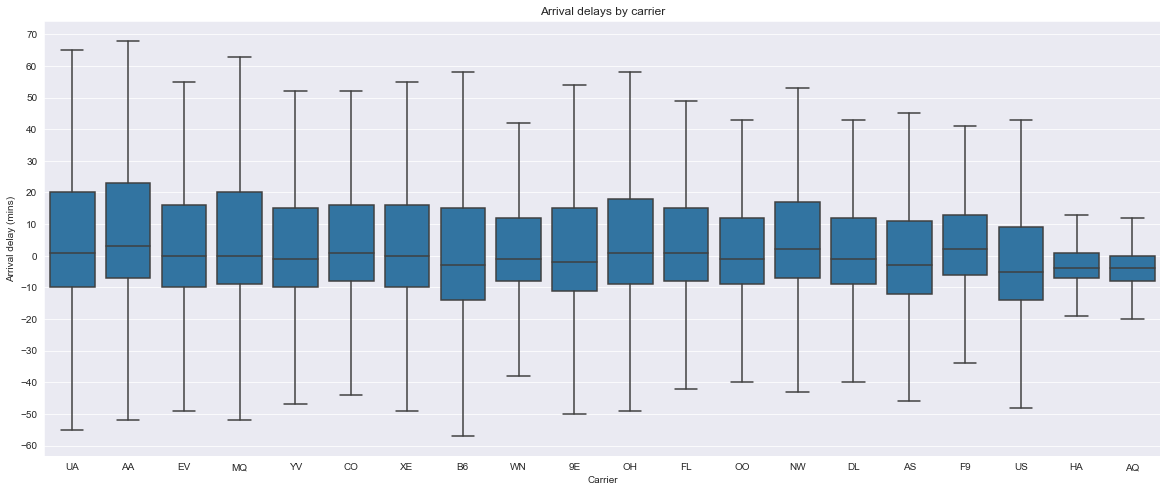

In [61]:
plt.figure(figsize=(20,8))

# plot boxplot
sns.boxplot(data=flights, x='carrier_code',y='arr_delay', color=base_colour,order=order,showfliers=False)

# labels
plt.xlabel('Carrier')
plt.ylabel('Arrival delay (mins)')
tick_locs = np.arange(-60,70+10,10)
plt.yticks(tick_locs)
plt.title('Arrival delays by carrier');

The boxplot above shows us that the mean arrival delay for all of the carriers is close to 0, therefore most flights do arrive on time. However, when comparing the distribution of arrival delays, some flights are more likely to deviate from the scheduled arrival time, for example, for UA, AA, and MQ, just over 25% of flights were 20 minutes late. On the other hand, for HA and AQ, around 75% of flights arrived on time, most flights from these two carriers arrive early. These two carriers also have the smallest range of arrival delays suggesting the estimated arrival time is the most accurate.

Therefore, just like departure delays, flights are generally not delayed, however when comparing the length of the delays when they do occur there is a wide variation. Again, HA and AQ are the most punctual whilst UA and AA again rank as the two with the worst punctuality.

### Proportion of cancellations by carrier

In [62]:
# Calculate mean values by carrier
carrier_cancel = flights.groupby('carrier_code').mean()

# Set order
carrier_order = carrier_cancel.cancelled.sort_values(ascending=False).index

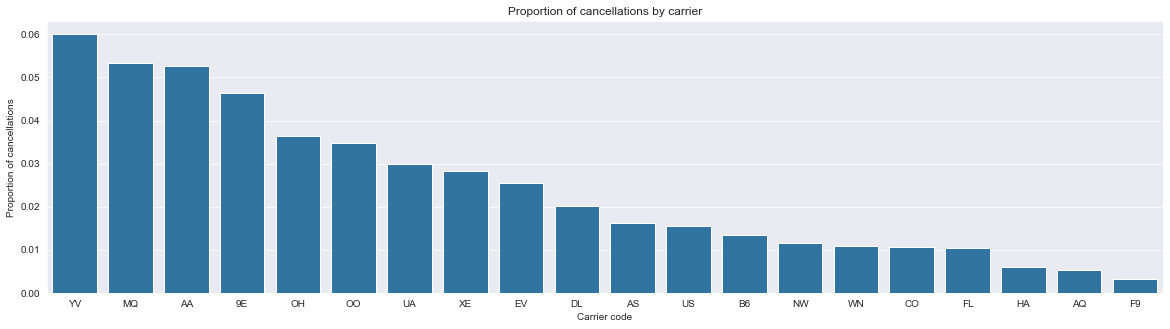

In [63]:
plt.figure(figsize=(20,5))
# plot graph
sns.barplot(data=carrier_cancel,x=carrier_cancel.index,y='cancelled',order=carrier_order,color=base_colour)

# labels
plt.xlabel('Carrier code')
plt.ylabel('Proportion of cancellations')
plt.title('Proportion of cancellations by carrier');

The barchart above shows the porportion of cancellations by carrier. There is a large difference between the carrier with the most cancellations (YV) at 0.06 whilst the one with the least, F9 had less than 0.005. Therefore, when deciding which carrier to fly with, it is important to consider which carrier you are using as the cancellation rate does vary significantly. From 6% to less than 0.5%.

### Do flights that depart late make up time to reduce lateness?

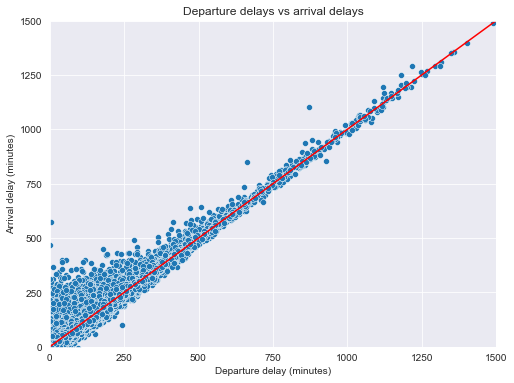

In [64]:
plt.figure(figsize=(8,6))
darkgrid()
# plot scatterplot
sns.scatterplot(data=flights,x='dep_delay',y='arr_delay')
plt.plot([0, 2500], [0, 2500],color='red')

#set tick locations
limit = (0,1500)
scale = np.arange(0,1500+1,250)
plt.xlim(limit)
plt.ylim(limit)
plt.yticks(scale)
plt.xticks(scale)

# labels
plt.ylabel('Arrival delay (minutes)')
plt.xlabel('Departure delay (minutes)')
plt.title('Departure delays vs arrival delays');

The red line shows flights where the flight times are as expected, this is that the departure delay is the same as the arrival delay. Only delay times of less than 1500 minutes are displayed as this is where most of the points lie. Points below the line are flights that make up time whilst ones above have taken longer than expected. 

This scatter plot shows that most flights that depart late also arrive late, in fact, a large number of flights end up taking longer to arrive than expected. Very few flights make up time throughout the flight to reduce the delay on arrival. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

notes: try plotting long vs lat vs one other variable.
trey faceted approaches

### Tester


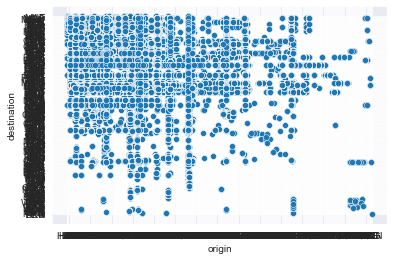

In [65]:
sns.scatterplot(data=flights,x='origin',y='destination');

In [66]:
airports = pd.read_csv('airports.csv')

In [67]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [68]:
flights.head()

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,1,3,Thursday,13:43,13:25,14:51,14:35,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,Thursday,11:25,11:20,12:47,12:45,WN,1343,...,3.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,Thursday,20:09,20:15,21:36,21:40,WN,3841,...,2.0,14.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,Thursday,09:03,08:55,12:03,12:05,WN,3,...,5.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2008,1,3,Thursday,14:23,14:00,17:26,17:10,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


### Comparing the proportion of flights cancelled or diverted at every airport by longitude and latitude

In [281]:
# find mean values by origin
origin_mean = flights.groupby('origin').mean().reset_index()
origin_mean

,origin,year,month,day_of_month,flight_number,actual_elapsed_time,scheduled_elapsed_time,air_time,arr_delay,dep_delay,distance,taxi_in_time,taxi_out_time,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ABE,2008.0,2.509012,15.658173,4210.604723,114.701847,114.727781,90.965040,9.090369,8.411184,526.683654,9.430739,14.296053,0.055314,0.002486,4.280298,0.594158,5.086389,0.000000,3.378496
1,ABI,2008.0,2.434240,15.665533,3423.365079,55.880282,56.894558,36.690141,10.430751,11.395076,158.000000,9.307512,9.885111,0.032880,0.001134,7.568027,2.643991,2.869615,0.000000,1.730159
2,ABQ,2008.0,2.513081,15.677058,1681.235316,109.088237,111.276144,91.471470,5.543149,7.812677,649.567175,6.581338,11.035230,0.010539,0.001400,1.782961,0.181222,1.714423,0.002358,5.333997
3,ABY,2008.0,2.511962,15.698565,4473.203349,54.241463,55.031100,34.963415,11.141463,11.970732,146.000000,10.802439,8.475610,0.019139,0.000000,7.538278,1.074163,3.787081,0.000000,0.669856
4,ACT,2008.0,2.414115,15.657790,3265.936085,50.861538,51.749667,30.539860,5.935664,6.832168,89.000000,10.969231,9.352448,0.047936,0.000000,1.805593,0.579228,1.862850,0.000000,4.660453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,WRG,2008.0,2.495868,15.636364,64.500000,29.797357,32.615702,17.215859,0.806167,5.217391,56.500000,4.264317,8.360870,0.049587,0.012397,0.925620,1.132231,1.285124,0.000000,7.132231
287,XNA,2008.0,2.510678,15.710008,4030.132538,111.454364,110.405326,86.097475,15.283784,14.441768,578.561558,9.941294,15.434696,0.052554,0.002303,4.246859,1.134003,7.261935,0.000000,5.757328
288,YAK,2008.0,2.495868,15.636364,63.500000,47.260870,48.628099,36.243478,2.521739,5.923404,206.000000,3.547826,7.548936,0.028926,0.020661,0.446281,0.198347,0.685950,0.000000,13.227273
289,YKM,2008.0,2.714286,16.027473,3862.659341,101.162011,90.000000,81.145251,13.670391,2.508380,586.000000,6.642458,13.374302,0.016484,0.000000,3.412088,1.000000,1.483516,0.000000,4.714286


In [282]:
# merge airport.csv columns to origin_mean
origin_sub = pd.DataFrame.merge(origin_mean,airports[['iata','airport','city','state','lat','long']],
                                      left_on = ['origin'],right_on=['iata'], how='left')

In [283]:
# round up/down to nearest 10
def roundup(x):
    return int(math.ceil(x / 10.0)) * 10
def rounddown(x):
    return int(math.floor(x/10.0)) * 10

In [286]:
def heatmap(x):
    colour = 'viridis_r'
    # plot graph
    ax = sns.scatterplot(data=origin_sub,x='long',y='lat',hue=x,palette = colour)
    
    # set labels and tick locations
    x_ticks = np.arange(rounddown(origin_sub['long'].min())-10,roundup(origin_sub['long'].max())+10,10)
    y_ticks = np.arange(rounddown(origin_sub['lat'].min())-10,roundup(origin_sub['lat'].max())+10,10)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.axis('scaled')
    plt.xticks
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # add colour bar, remove legend
    norm = plt.Normalize(origin_sub[x].min(), origin_sub[x].max())
    sm = plt.cm.ScalarMappable(cmap=colour, norm=norm)
    sm.set_array([])
    
    ax.get_legend().remove()
    bar = ax.figure.colorbar(sm)
    
    # colour bar labels
    if flights[x].max()==1:
        bar.set_label('Proportion '+ x)
        plt.title('Comparing proportion of flights '+ x +' by longitude and latitude')
    else:
        bar.set_label(x.replace('_',' ')+' (minutes)')
        plt.title('Mean flight delay (minutes) due to '+ x.replace('_'," ").replace('delay',''))

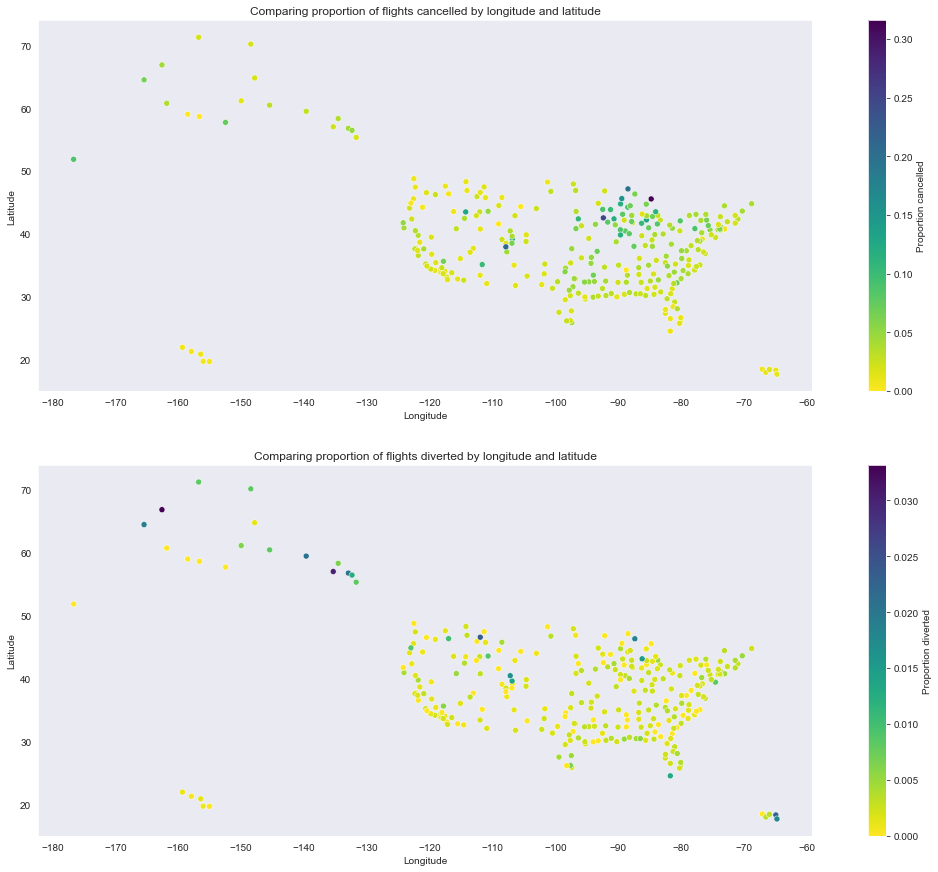

In [287]:
dark()
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
heatmap('cancelled')

plt.subplot(2,1,2)
heatmap('diverted')

The two scatter plots above allows for the visual comparison of the proportion of flights cancelled or diverted by as every point represents the airport the flight originated from geographically. This has been achieved by plotting the points based on their longitude and latitude values. 

The darker points indicate airports that had either the highest cancellation or diversion rates. It is interesting to see that the airports that had higher cancellation rates did not necessarily have a higher diversion rate. The more isolated airports appear to have a higher diversion rate than the airports that are located close to many other airports.

### Comparing the average flight delay in minutes for every airport by reason for delay

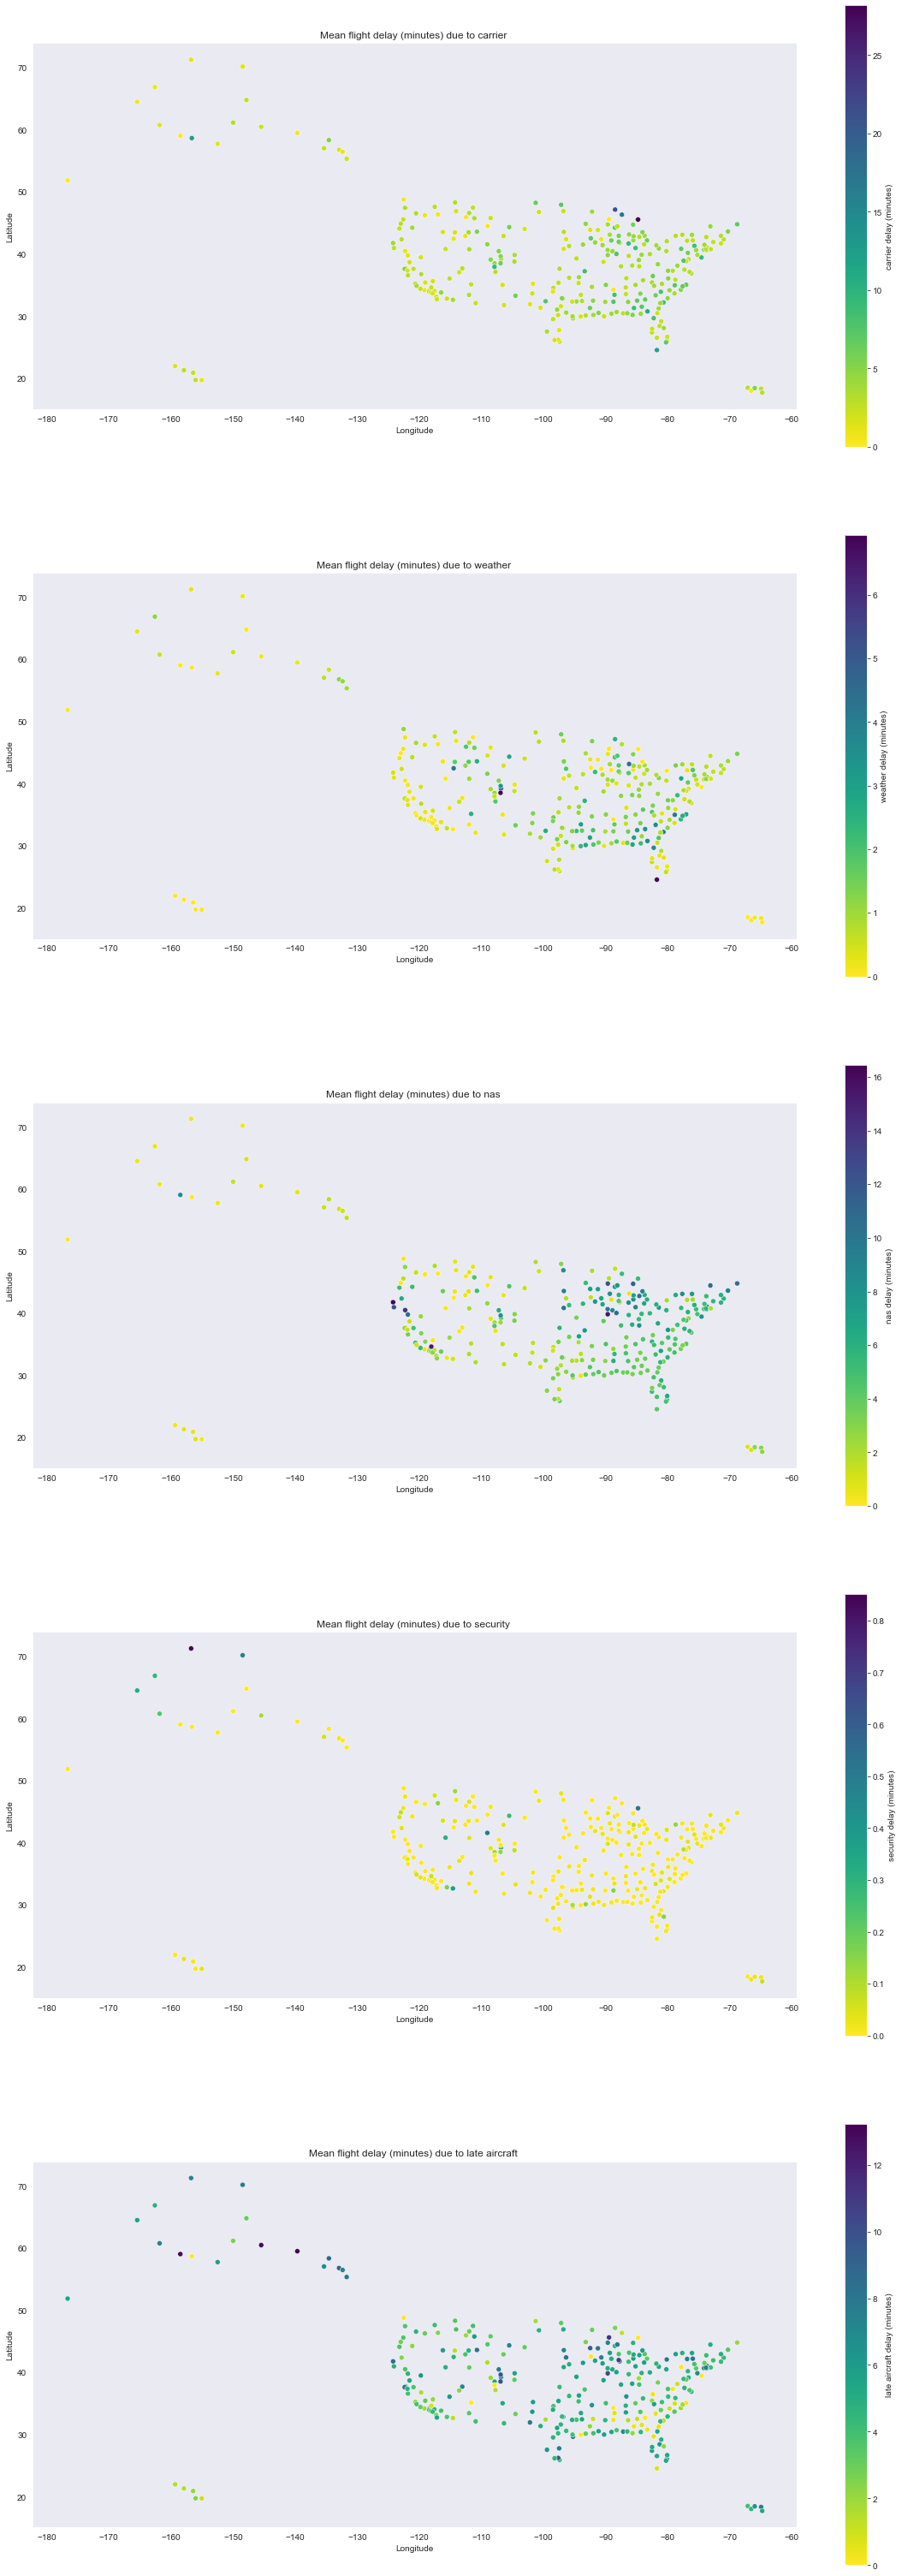

In [74]:
plt.figure(figsize=(20,55))

plt.subplot(5,1,1)
heatmap('carrier_delay')

plt.subplot(5,1,2)
heatmap('weather_delay')

plt.subplot(5,1,3)
heatmap('nas_delay')

plt.subplot(5,1,4)
heatmap('security_delay')

plt.subplot(5,1,5)
heatmap('late_aircraft_delay')

When comparing the flight delays at every airport, the first finding is that the delay times vary significantly depending on the cause of delay. Mean delays due to the carrier were the highest whilst delays due to security were the shortest. One reason for the low mean for security would be because very few flights were delayed due to security so for most flights, the delay would be 0 causing the mean to be significantly lower.

On average, most flights were delayed by no longer than 10 minutes due to the carrier. There were a handful of airports north of America that had a higher mean delay however. 

Weather doesn't affect many flights as the mean flight delay was only a 1-2 minutes. There are some areas that have a mean delay of closer 4-5 minutes. Perhaps these areas are more prone to extreme weather conditions such as snow, toranadoes and hurricanes?

Examples of NAS delays are: non-extreme weather conditions, airport operations, heavy traffic volume and air traffic control. The mean flight delay due to NAS appears to be lowest in areas less densely populated with airports, this could be due to fewer flights leading to lower traffic volumes. Airports that are most busy would be expected to have the highest mean delay due to heavier traffic.

The mean security delays were lower than 1 minute for all airports listed, therefore security issues are rarely a cause of flight cancellations.

The highest mean delays due to late aircraft were found in remotest airports listed, perhaps difficulties reaching these airports or fewer available aircrafts may be to blame for these delays. High mean delays are also found clustered in the areas with higher delays due to NAS. This could further suggest that those airports are the busiest and if an aircraft gets delayed due to NAS, that aircraft would also end up being late.

### Number of cancelled flights by day of the month

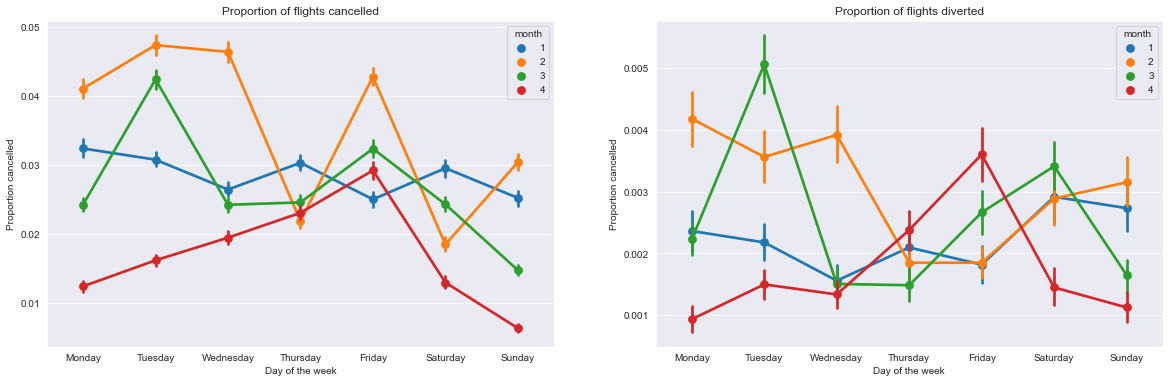

In [121]:
darkgrid()
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.pointplot(data=flights,x='day_of_week',y='cancelled',hue='month')
plt.xlabel('Day of the week')
plt.ylabel('Proportion cancelled')
plt.title('Proportion of flights cancelled')

plt.subplot(1,2,2)
sns.pointplot(data=flights,x='day_of_week',y='diverted',hue='month')
plt.xlabel('Day of the week')
plt.ylabel('Proportion cancelled')
plt.title('Proportion of flights diverted');

There is a fairly large difference between the proportion of flights cancelled between the different months. February had the highest proportion of flights cancelled all days except Thursday and Saturday. April had the lowest proportion of flight cancellations for most days. 

When comparing the proportion of flights diverted, the proportion when compared to cancellations is approximately 10x smaller. This shows that diversions are much rarer than cancellations. Although the error bars appear larger than the ones on the cancellation graph, due to the y scale difference, the errors are not as significant as they seem.

### Does the type of delay affect how long the flight is delayed and does the day of the week influence this?

In [341]:
carrier_delay = flights[flights['carrier_delay']>0].groupby('day_of_week').mean()
weather_delay = flights[flights['weather_delay']>0].groupby('day_of_week').mean()
nas_delay = flights[flights['nas_delay']>0].groupby('day_of_week').mean()
security_delay = flights[flights['security_delay']>0].groupby('day_of_week').mean()
late_aircraft_delay = flights[flights['late_aircraft_delay']>0].groupby('day_of_week').mean()

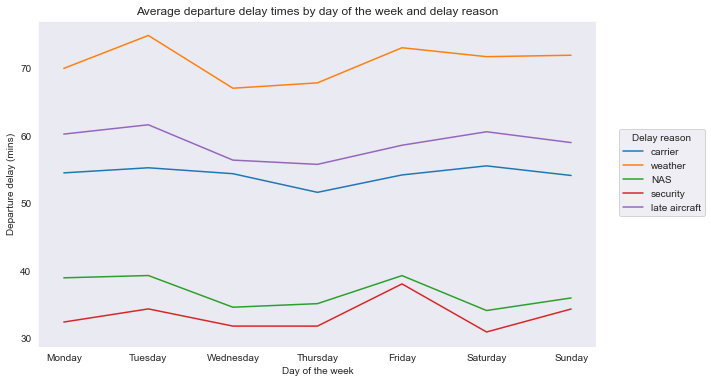

In [362]:
plt.figure(figsize=(10,6))
#plots
plt.plot(carrier_delay.dep_delay)
plt.plot(weather_delay.dep_delay)
plt.plot(nas_delay.dep_delay)
plt.plot(security_delay.dep_delay)
plt.plot(late_aircraft_delay.dep_delay)
#labels
plt.ylabel('Departure delay (mins)')
plt.xlabel('Day of the week')
plt.title('Average departure delay times by day of the week and delay reason')
plt.legend(['carrier','weather','NAS','security','late aircraft'],title = 'Delay reason',loc=(1.04,0.4));

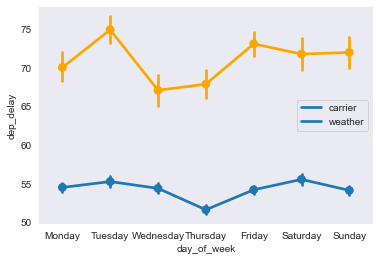

In [325]:
###in progress - remove later
#plt.subplot(1,1,1)
sns.pointplot(data=carrier_delay,x='day_of_week',y='dep_delay')
#plt.subplot(1,1,1)
sns.pointplot(data=weather_delay,x='day_of_week',y='dep_delay',color='orange')

plt.legend(['carrier','weather'])

### Examining the number of flights at each airport

In [297]:
origin_counts = flights.origin.value_counts().rename_axis('origin').reset_index(name='counts')
origin_counts_sub = pd.DataFrame.merge(origin_counts,airports[['iata','lat','long']],
                                      left_on = ['origin'],right_on=['iata'], how='left')

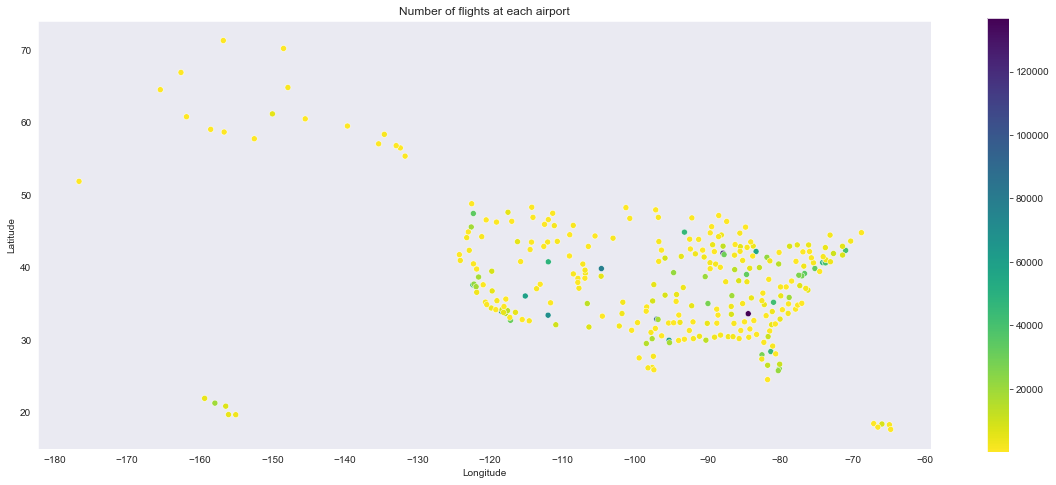

In [313]:
plt.figure(figsize=(20,8))
ax = sns.scatterplot(data=origin_counts_sub,x='long',y='lat',hue='counts',palette = 'viridis_r')

# labels
x_ticks = np.arange(rounddown(origin_counts_sub['long'].min())-10,roundup(origin_counts_sub['long'].max())+10,10)
y_ticks = np.arange(rounddown(origin_counts_sub['lat'].min())-10,roundup(origin_counts_sub['lat'].max())+10,10)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.axis('scaled')
plt.xticks
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of flights at each airport')

norm = plt.Normalize(origin_counts_sub['counts'].min(), origin_counts_sub['counts'].max())
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)
sm.set_array([])

ax.get_legend().remove()
bar = ax.figure.colorbar(sm);


By taking the longitude and latitude of every airport listed, the number of flights at each airport be seen visually. the darker spots show the airports that are the busiest. The yellow spots show the airports that have relatively few flights.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you **remove all of
the quote-formatted guide notes** like this one before you finish your report!